# Chapter 3 Simple tight binding models

## 1. 1D case
Firstly we will think about the tight binding models for 1D array of atoms.
The matrix can be simplified to be 
$$
\left( 
\begin{matrix}
-\mu  & -t & 0 & 0 & \dots \\
-t  & -\mu & -t & 0 & \dots \\
0  & -t & -\mu & -t & \dots \\
\vdots  & \vdots & \vdots & \vdots & \dots \\
\end{matrix}
\right)
\left( 
\begin{matrix}
c_1  \\
c_2  \\
c_3  \\
\vdots  \\
\end{matrix}
\right) = E \left( 
\begin{matrix}
c_1  \\
c_2  \\
c_3  \\
\vdots  \\
\end{matrix}
\right)
$$
The matrix can be composed as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_HtbModel(Nx,μ):
    mat_Htb = np.zeros((Nx,Nx))    
    t = 1.0
    for i in range(Nx):
        for dx in (-1, 0, 1):
            j = i + dx
            if j > Nx -1:
                j = 0
            if j < 0:
                j = Nx-1
            if dx ==0:
                mat_Htb[i,j] = -μ
            elif abs(dx) == 1:   
                mat_Htb[i,j] = -t    
    return mat_Htb

Let us calculate the the eigenenergies and eigenvectors for 1000 atoms. The histgram of the eigenenergies (density of state) will be shown.

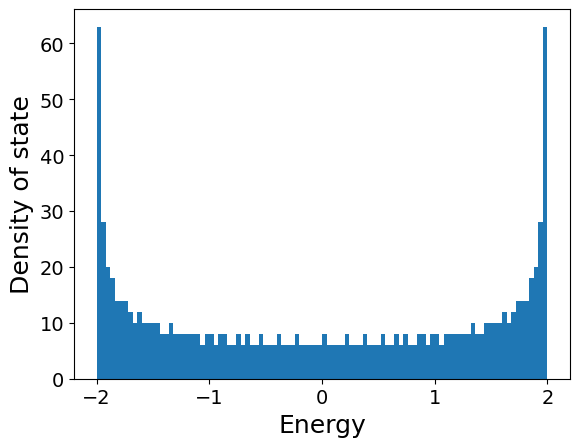

In [6]:
μ=0.0
Nx = 1000
mat_H = calc_HtbModel(Nx,μ)
energy,mat_v = np.linalg.eig(mat_H)

ind = np.argsort(energy)
energy = energy[ind]
mat_v = mat_v.T[ind]

plt.hist(energy, bins = 100)
plt.xlabel("Energy", fontsize = 18)
plt.ylabel("Density of state", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

## 2 Tight binding model in 2D space
We will construct a matrix for 2D square lattice, considering onky the nearest neighbor hoppings as $-t$.

In [4]:
def calc_HtbModel2D(Nx,Ny,μ):
    N = Nx*Ny
    mat_Htb = np.zeros((N,N))    
    t = 1.0
    for ix in range(Nx):
        for iy in range(Ny):
            for dx in (-1, 0, 1):
                for dy in (-1, 0, 1):
                    jx = ix + dx
                    jy = iy + dy
                    # boundary consition
                    if jx > Nx -1:
                        jx = 0
                    if jx < 0:
                        jx = Nx -1

                    if jy > Ny -1:
                        jy = 0
                    if jy < 0:
                        jy = Ny -1
                    
                    ii = iy*Nx+ix# For each iy, there are Nx atoms
                    jj = jy*Nx+jx# interacting atom
                    
                    if (dx == 0) and (dy == 0):
                        mat_Htb[ii,jj] = -μ
                    elif abs(dx)==1 and dy ==0:
                        mat_Htb[ii,jj] = -t
                    elif abs(dy)==1 and dx == 0:
                        mat_Htb[ii,jj] = -t  
    return mat_Htb


The density of state can be calculated to be

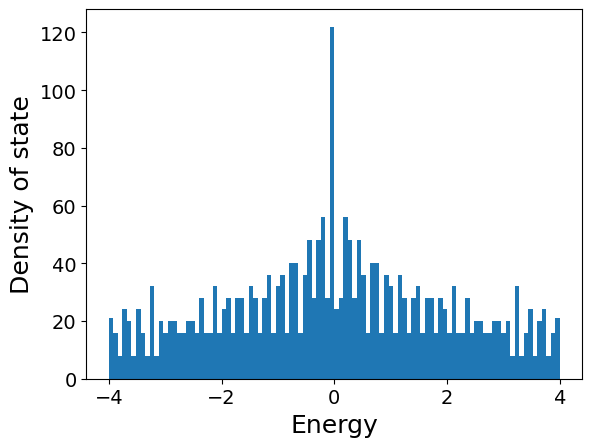

In [7]:
μ=0.0
Nx = 50
Ny = 50
mat_H = calc_HtbModel2D(Nx,Ny,μ)

energy,mat_v = np.linalg.eig(mat_H)
ind = np.argsort(energy)
energy = energy[ind]
mat_v = mat_v.T[ind]
plt.hist(energy, bins = 100)
plt.xlabel("Energy", fontsize = 18)
plt.ylabel("Density of state", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()